In [2]:
import pandas as pd
import numpy as np
import os

In [97]:
df = pd.read_csv(r"C:\Users\bensu\Desktop\ML Projects\Practice-Project\Pandas Analysis\Sales_Data\Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.shape

(18383, 6)

In [7]:
files = [file for file in os.listdir(r"C:\Users\bensu\Desktop\ML Projects\Practice-Project\Pandas Analysis\Sales_Data")]

In [8]:
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [9]:
#combining all the files in one

In [10]:
all_csv = pd.DataFrame()

In [12]:
for file in files:
    df = pd.read_csv(r"C:\Users\bensu\Desktop\ML Projects\Practice-Project\Pandas Analysis\Sales_Data\\"+file)
    all_csv = pd.concat([all_csv,df],ignore_index = False)

In [14]:
all_csv.head()
all_csv.shape

(186850, 6)

In [15]:
all_csv.to_csv("all_csv.csv",index=False)

In [98]:
#Loading new CSV with all data 
all_file = pd.read_csv("all_csv.csv")
all_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


###### Cleaning data

In [99]:
all_file.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [100]:
all_file = all_file.dropna()

In [101]:
all_file.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [102]:
all_file = all_file[all_file['Order Date'].str[0:2] != 'Or']

In [103]:
all_file['Month'] = all_file['Order Date'].str[0:2].astype('int32')

In [104]:
all_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [105]:
all_file.groupby('Month').sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Month,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,1121411111111111111111111111311112112111111111...,14.9570014.9560011.9915011.9511.9599.9914.9510...,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne..."
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,1111211111111111111211111112411121111211111111...,7003.84389.9914.953.8414.953.8415011.9511.9599...,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S..."
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,1111111111111111211211111151211111111131111111...,2.992.9911.9999.99999.9911.9999.99999.9911.953...,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada..."
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,2111111111111111111111111112111211111112131121...,11.9599.9960011.9911.9911.9599.9911.95170011.9...,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B..."
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,1111111111211111111111111111111121111111111111...,150149.9970015060011.9515099.9915099.993.84150...,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,..."
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,1111111111111111111111131111111211111211111111...,11.951700.0999.99149.9999.99150.014.95150.011....,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa..."
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,1111511111111111211111112112112111111111111121...,1503003.843.842.9999.99600600.011.9514.953.841...,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea..."
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,2112211111111111111111111111121111131211112111...,11.9999.99700.03.843.8411.99379.99109.9911.991...,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ..."
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,1111111111114211111111131111111111111121111111...,150379.9914.952.99999.99149.9911.9514.9599.991...,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ..."


In [106]:
all_file['Quantity Ordered'] = pd.to_numeric(all_file['Quantity Ordered'])
all_file['Price Each'] = pd.to_numeric(all_file['Price Each'])

In [107]:
all_file['Sales'] = all_file['Quantity Ordered']*all_file['Price Each']

In [108]:
all_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Question 1) . What was the best Month for Sales ? How much was earned that Month ? 

In [109]:
sales_sum = all_file.groupby('Month').sum()

In [110]:
all_file.groupby('Month').sum()['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

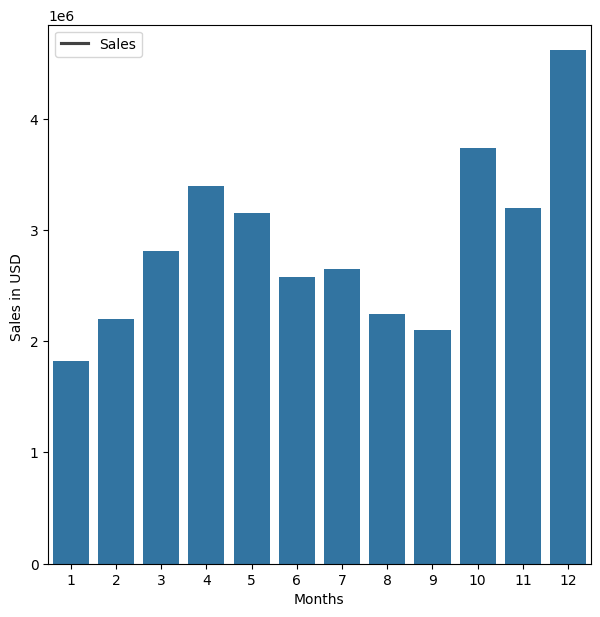

In [112]:
months = range(1,13)
plt.figure(figsize=(7,7))
sns.barplot(x = months,y = sales_sum['Sales'])
plt.legend(['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales in USD ')
plt.show()

##### Question 2). What USA city has the highest Number of the sales ?

In [113]:
all_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Add The city Column

In [114]:
#we can use .apply method
all_file['Cities'] = all_file['Purchase Address'].apply(lambda x: x.split(',')[1])
all_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [115]:
def all_states(states):
    return states.split(',')[2].split(' ')[1]
all_file['States'] = all_file['Purchase Address'].apply(lambda x :x.split(',')[1]+ " " + all_states(x))
all_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,States
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA


In [116]:
sale_city = all_file.groupby('States').sum()
sale_city

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
States,,,,,,,,,
Atlanta GA,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58,Atlanta Atlanta Atlanta Atlanta Atlanta Atlan...
Austin TX,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75,Austin Austin Austin Austin Austin Austin Aus...
Boston MA,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01,Boston Boston Boston Boston Boston Boston Bos...
Dallas TX,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40,Dallas Dallas Dallas Dallas Dallas Dallas Dal...
Los Angeles CA,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80,Los Angeles Los Angeles Los Angeles Los Angel...
New York City NY,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43,New York City New York City New York City New...
Portland ME,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27,Portland Portland Portland Portland Portland ...
Portland OR,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34,Portland Portland Portland Portland Portland ...
San Francisco CA,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91,San Francisco San Francisco San Francisco San...


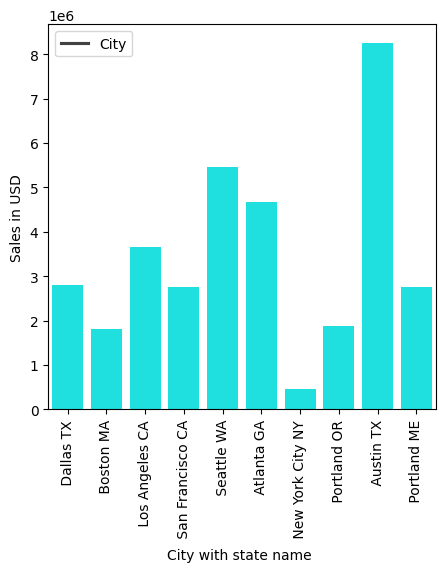

In [117]:
plt.figure(figsize = (5,5))
city_val = all_file['States'].unique()
sns.barplot(x = city_val,y = sale_city['Sales'],color='cyan')
plt.xticks(city_val,rotation = 'vertical',size = 10)
plt.legend(['City'],loc = 'upper left')
plt.xlabel('City with state name ')
plt.ylabel('Sales in USD')
plt.show()

In [118]:
all_file.drop(columns = 'Cities',inplace = True) # or all_file = all_file.drop(columns = 'Cities')

In [119]:
all_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,States
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [120]:
#converting string into datetime
all_file['Order Date'] = pd.to_datetime(all_file['Order Date'])
all_file.head()

C:\Users\bensu\AppData\Local\Temp\ipykernel_13708\421441019.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_file['Order Date'] = pd.to_datetime(all_file['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,States
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [122]:
#seperating the hour from the Order Date using inbuilt function
all_file['Hour'] = all_file['Order Date'].dt.hour
all_file['Minute'] = all_file['Order Date'].dt.minute
all_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,States,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


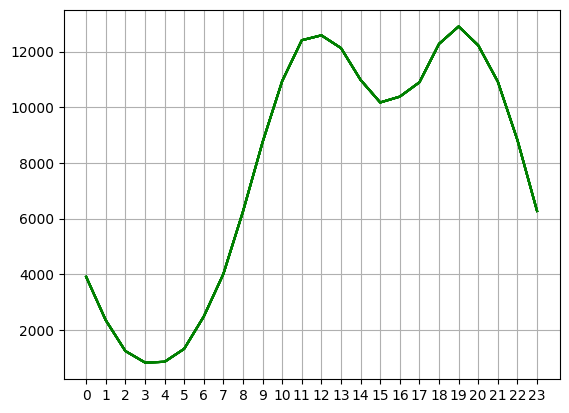

In [135]:
hours = [hour for hour,df in all_file.groupby('Hour')]
plt.plot(hours,all_file.groupby(['Hour']).count(),'green')
plt.xticks(hours)
plt.grid()
plt.show()

#####  question 4). What products are often sold together ?

In [136]:
df = all_file[all_file['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,States,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31


In [138]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\Users\bensu\AppData\Local\Temp\ipykernel_13708\759627908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,States,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [140]:
df = df[['Order ID','Grouped']].drop_duplicates()
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [141]:
from itertools import combinations
from collections import Counter

In [142]:
count = Counter()

In [143]:
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))# make 2 to 3 to get three common prodcuts
    
count

Counter({('Google Phone', 'Wired Headphones'): 414,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 27,
         ('AAA Batteries (4-pack)', 'Google Phone'): 11,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Apple Airpods Headphones', 'ThinkPad Laptop'): 9,
         ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 37,
         ('34in Ultrawide Monitor', 'Google Phone'): 2,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('AAA Batteries (4-pack)', '27in FHD Monitor'): 22,
         ('USB-C Charging Cable', 'AAA Batteries (4-pack)'): 45,
         ('iPhone', 'Wired Headphones'): 447,
         ('iPhone', '27in 4K Gaming Monitor'): 6,
         ('ThinkPad Laptop', 'AAA Batteries (4-pack)'): 16,
         ('iPhone', 'Apple Airpods Headph

In [145]:
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5). what product is sold the most and why it is sold the most ?

In [149]:
product_group = all_file.groupby('Product')
product_group.sum(numeric_only=True)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [157]:
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

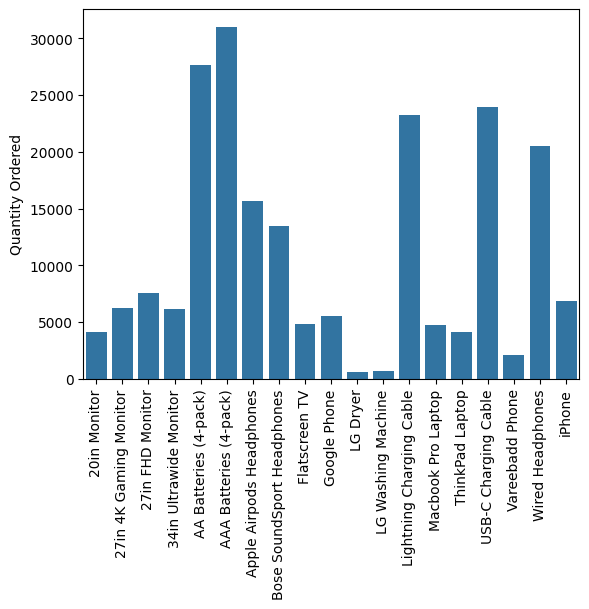

In [164]:
products_val = [product for product,df in product_group]
sns.barplot(x = products_val,y = quantity_ordered )
# plt.figure(figsize=(8,8))
plt.xticks(products_val,rotation = 'vertical',size = 10)
plt.show()